# Import Libraries

In [8]:
import pandas as pd   
import os

import seaborn as sns
import matplotlib.pyplot as plt
# import scipy.stats as sts

import numpy as np
# import psycopg2 

# Load Data

In [2]:
df_customer = pd.read_csv('1_datasets/customer.csv')
df_product = pd.read_csv('1_datasets/product.csv')
df_demographics =  pd.read_csv('1_datasets/demographics.csv')

# df_customer.head()
# df_product.head()
# df_demographics.head()

# Transform Data

In [67]:
# df.columns

In [3]:
# Join customers, product, and demographics tables
merge1 = pd.merge(df_customer, df_product, on = ['cust_id', 'product_id'])
merge2 = pd.merge(merge1, df_demographics, on = 'cust_id')
df_merged = merge2

# df_merged.head()

In [4]:
# Find averages for usage and gross_revenue
df_sum_drop = df_merged.drop(columns = ['cust_id', 'product_id', 'fiscal_year', 'reporting_months', 'loyalty', 'user_environment', 'subscribed'])
df_sum = df_sum_drop.groupby(['product_sku', 'product_brand', 'age', 'sex', 'income', 'state']).mean()
df_sum_indexed = df_sum.reset_index()

# Find counts for product_id
df_ct_drop = df_merged.drop(columns = ['usage', 'gross_revenue', 'product_id', 'fiscal_year', 'reporting_months', 'loyalty', 'user_environment', 'subscribed'])
df_ct = df_ct_drop.groupby(['product_sku', 'product_brand', 'age', 'sex', 'income', 'state']).count()
df_ct_indexed = df_ct.reset_index()

df = pd.merge(df_sum_indexed, df_ct_indexed)

# df_sum_indexed.head()
# df_ct_indexed.head()
df.head()

,product_sku,product_brand,age,sex,income,state,usage,gross_revenue,cust_id
0,AB,Circle,26-45,Female,$500-$1000,IA,44.233805,110.584513,3
1,AB,Circle,26-45,Female,$500-$1000,MO,51.924213,129.810534,2
2,AB,Circle,26-45,Female,$500-$1000,WI,46.000037,115.000093,1
3,AB,Circle,26-45,Female,Above $1000,MO,52.461409,131.153523,3
4,AB,Circle,26-45,Female,Under $500,IN,51.044714,127.611784,1


In [5]:
# Create dummy variables for demographic fields
df_dummies = pd.get_dummies(df, columns = ['age', 'sex', 'income', 'state'])

df_dummies.head()

,product_sku,product_brand,usage,gross_revenue,cust_id,age_26-45,age_46-65,age_<25,age_>65,sex_Female,...,sex_Other,income_$500-$1000,income_Above $1000,income_Under $500,state_IA,state_IL,state_IN,state_MN,state_MO,state_WI
0,AB,Circle,44.233805,110.584513,3,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,AB,Circle,51.924213,129.810534,2,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,AB,Circle,46.000037,115.000093,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,AB,Circle,52.461409,131.153523,3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,AB,Circle,51.044714,127.611784,1,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


# Export Data

In [106]:
df = df_dummies

In [107]:
df.to_csv('clean_profile_dataset.csv', index = False)

# Visualize Data

## <font color = 'blue' > Ungrouped Histograms

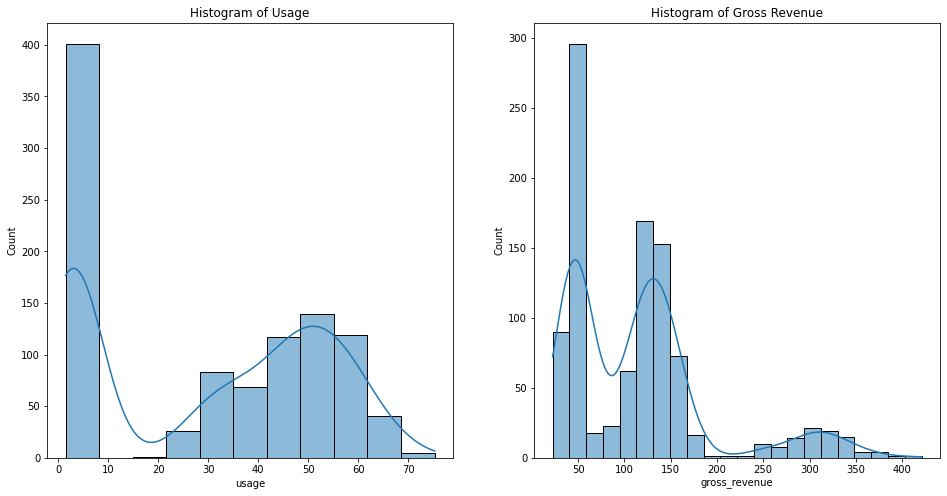

In [9]:
# Create two subplot histograms for usage and gross revenue
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 8))

sns.histplot(data=df_merged, x = "usage", ax=axes[0], kde = True).set(title = "Histogram of Usage", )
sns.histplot(data=df_merged, x = "gross_revenue", ax=axes[1], kde = True).set(title = "Histogram of Gross Revenue")

plt.show()

## <font color = 'blue' > Histograms Shaded by Product Line

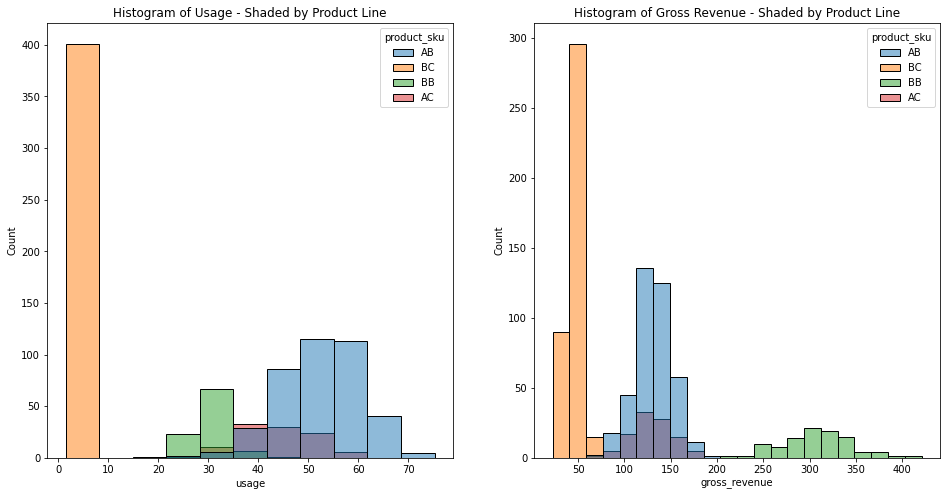

In [10]:
# Create two subplot histograms for usage and gross revenue, including shabing grouped by product line/sku
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 8))

sns.histplot(data=df_merged, x = "usage", ax=axes[0], hue = "product_sku").set(title = "Histogram of Usage - Shaded by Product Line", )
sns.histplot(data=df_merged, x = "gross_revenue", ax=axes[1], hue = "product_sku").set(title = "Histogram of Gross Revenue - Shaded by Product Line")

plt.show()

Product SKU AB = Product Line Basic,
Product SKU AC = Product Line Basic+,
Product SKU BB = Product Line Deluxe,
Product SKU BC = Product Line Max

![Pencils](pencilsETC.PNG)